In [1]:
import pandas as pd
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt

In [2]:
def callEuOpt(rate, maturity, strike, future, volatility):
    """The Black 76 model for a European call-option price.
        r = interest rate (continuously compounded per anuum)
        maturity = date of maturity
        future = future price
        strike = strike price
        volatility = volatility"""
    d1 = (np.log(future/strike)+maturity*(volatility**2/2))/(volatility*maturity**(0.5))
    d2 = d1 - volatility*maturity**(0.5)
    Nd1 = st.norm.cdf(d1)
    Nd2 = st.norm.cdf(d2)
    return np.exp(-rate*maturity)*(future*Nd1-strike*Nd2)
def putEuOpt(rate, maturity, strike, future, volatility):
    """The Black 76 model for a European put-option price.
        r = interest rate (continuously compounded per anuum)
        maturity = date of maturity
        future = future price
        strike = strike price
        volatility = volatility"""
    d1 = (np.log(future/strike)+maturity*(volatility**2/2))/(volatility*maturity**(0.5))
    d2 = d1 - volatility*maturity**(0.5)
    Nd1 = st.norm.cdf(-1*d1)
    Nd2 = st.norm.cdf(-1*d2)
    return np.exp(-rate*maturity)*(strike*Nd2-future*Nd1)

In [3]:
interest = pd.read_csv("InterestRates.csv")

In [4]:
interest["pricedate"] = pd.to_datetime(interest["pricedate"])

In [5]:
interest["maturity"] = np.array([int(time[:-1]) if time[-1] =="M" else int(time[:-1])*12 for time in interest["maturity"]])

In [6]:
interest["maturityDate"] = interest["pricedate"]+interest["maturity"].apply(lambda x: pd.tseries.offsets.DateOffset(months = x))-pd.offsets.MonthBegin(1)

C:\Users\Guillermo\anaconda3\lib\site-packages\pandas\core\arrays\datetimelike.py:1215: PerformanceWarning: Adding/subtracting array of DateOffsets to DatetimeArray not vectorized
  PerformanceWarning,


In [7]:
interest = interest.set_index(["pricedate", "maturityDate"])

In [8]:
indName = ["asOfDate", "maturityDate"]
interest.rename_axis(indName, inplace = True)

In [9]:
interest.sort_index(inplace = True)

In [10]:
interest

maturity   bidrate
asOfDate   maturityDate                    
2020-03-02 2020-04-01           1  1.110001
           2020-05-01           2  0.995003
           2020-06-01           3  0.930000
           2020-07-01           4  0.894997
           2020-08-01           5  0.864998
...                           ...       ...
2020-05-29 2029-02-01         105  1.224998
           2029-03-01         106  1.224998
           2029-04-01         107  1.228332
           2029-05-01         108  1.231666
           2029-06-01         109  1.235001

[7085 rows x 2 columns]

In [11]:
natGas_volatility_2020 = pd.read_csv("NG_impliedVols2020.csv")
natGas_volatility_2021 = pd.read_csv("NG_impliedVols2021.csv")

In [ ]:
#natGas_volatility_2020.head()

In [12]:
for df in (natGas_volatility_2020, natGas_volatility_2021):
    df[["volatilitydate","begtime"]] = df[["volatilitydate","begtime"]].apply(pd.to_datetime, format = "%Y-%m-%d")

In [13]:
for df in (natGas_volatility_2020, natGas_volatility_2021):
    df.set_index(["volatilitydate", "begtime"], inplace = True)
    df.sort_index(inplace = True)
    df.rename_axis(indName, inplace = True)
    df.head()

In [14]:
natGas2020 = pd.merge(interest, natGas_volatility_2020, left_index = True, right_index = True, how = "inner")
natGas2021 = pd.merge(interest, natGas_volatility_2021, left_index = True, right_index = True, how = "inner")

In [15]:
natGas2020.head()

maturity   bidrate      volatilityindex  strikeprice  \
asOfDate   maturityDate                                                         
2020-03-02 2020-04-01           1  1.110001  V_NYMEX Natural Gas         1.03   
           2020-04-01           1  1.110001  V_NYMEX Natural Gas         1.08   
           2020-04-01           1  1.110001  V_NYMEX Natural Gas         1.13   
           2020-04-01           1  1.110001  V_NYMEX Natural Gas         1.18   
           2020-04-01           1  1.110001  V_NYMEX Natural Gas         1.23   

                         volatility  
asOfDate   maturityDate              
2020-03-02 2020-04-01         0.592  
           2020-04-01         0.576  
           2020-04-01         0.562  
           2020-04-01         0.548  
           2020-04-01         0.535

In [16]:
natGas2021.head()

maturity   bidrate      volatilityindex  strikeprice  \
asOfDate   maturityDate                                                         
2020-03-02 2021-01-01          10  0.824999  V_NYMEX Natural Gas         1.31   
           2021-01-01          10  0.824999  V_NYMEX Natural Gas         1.36   
           2021-01-01          10  0.824999  V_NYMEX Natural Gas         1.41   
           2021-01-01          10  0.824999  V_NYMEX Natural Gas         1.46   
           2021-01-01          10  0.824999  V_NYMEX Natural Gas         1.51   

                         volatility  
asOfDate   maturityDate              
2020-03-02 2021-01-01         0.355  
           2021-01-01         0.353  
           2021-01-01         0.351  
           2021-01-01         0.349  
           2021-01-01         0.347

In [17]:
futprices = pd.read_csv("PricesFile1.csv")
futprices.head()

,priceindex,pricedate,delivdate,price
0,AECO NIT MONTHLY (7A) US$,2020-03-01,2020-03-01,1.3219
1,AECO NIT MONTHLY (7A) US$,2020-04-01,2020-04-01,1.2421
2,AECO NIT MONTHLY (7A) US$,2020-05-01,2020-05-01,1.3385
3,AECO NIT MONTHLY (7A) US$ FWD,2020-03-02,2020-04-01,-0.5140
4,AECO NIT MONTHLY (7A) US$ FWD,2020-03-02,2020-05-01,-0.6160


In [18]:
#Create a new dataframe with the NaturalGass future prices only (indexing creates a view of the original dataframe)
futprices_NatGas = pd.DataFrame(futprices[futprices["priceindex"] == "NYMEX Natural Gas"])

In [19]:
futprices_NatGas[["pricedate", "delivdate"]] = futprices_NatGas[["pricedate", "delivdate"]].apply(pd.to_datetime, format = "%Y-%m-%d")

In [20]:
futprices_NatGas.set_index(["pricedate", "delivdate"], inplace = True)
futprices_NatGas.sort_index(inplace = True)
futprices_NatGas.rename_axis(indName, inplace = True)

In [68]:
futprices_NatGas.head()

priceindex  price
asOfDate   maturityDate                          
2020-03-02 2020-04-01    NYMEX Natural Gas  1.755
           2020-05-01    NYMEX Natural Gas  1.796
           2020-06-01    NYMEX Natural Gas  1.857
           2020-07-01    NYMEX Natural Gas  1.934
           2020-08-01    NYMEX Natural Gas  1.968

In [50]:
natGas2020 = pd.merge(natGas2020, futprices_NatGas, left_index = True, right_index = True, how = "inner")
natGas2021 = pd.merge(natGas2021, futprices_NatGas, left_index = True, right_index = True, how = "inner")

In [51]:
natGas2020.head()

maturity   bidrate      volatilityindex  strikeprice  \
asOfDate   maturityDate                                                         
2020-03-02 2020-04-01           1  1.110001  V_NYMEX Natural Gas         1.03   
           2020-04-01           1  1.110001  V_NYMEX Natural Gas         1.08   
           2020-04-01           1  1.110001  V_NYMEX Natural Gas         1.13   
           2020-04-01           1  1.110001  V_NYMEX Natural Gas         1.18   
           2020-04-01           1  1.110001  V_NYMEX Natural Gas         1.23   

                         volatility         priceindex  price  
asOfDate   maturityDate                                        
2020-03-02 2020-04-01         0.592  NYMEX Natural Gas  1.755  
           2020-04-01         0.576  NYMEX Natural Gas  1.755  
           2020-04-01         0.562  NYMEX Natural Gas  1.755  
           2020-04-01         0.548  NYMEX Natural Gas  1.755  
           2020-04-01         0.535  NYMEX Natural Gas  1.755

In [52]:
natGas2021.head()

maturity   bidrate      volatilityindex  strikeprice  \
asOfDate   maturityDate                                                         
2020-03-02 2021-01-01          10  0.824999  V_NYMEX Natural Gas         1.31   
           2021-01-01          10  0.824999  V_NYMEX Natural Gas         1.36   
           2021-01-01          10  0.824999  V_NYMEX Natural Gas         1.41   
           2021-01-01          10  0.824999  V_NYMEX Natural Gas         1.46   
           2021-01-01          10  0.824999  V_NYMEX Natural Gas         1.51   

                         volatility         priceindex  price  
asOfDate   maturityDate                                        
2020-03-02 2021-01-01         0.355  NYMEX Natural Gas  2.494  
           2021-01-01         0.353  NYMEX Natural Gas  2.494  
           2021-01-01         0.351  NYMEX Natural Gas  2.494  
           2021-01-01         0.349  NYMEX Natural Gas  2.494  
           2021-01-01         0.347  NYMEX Natural Gas  2.494

In [53]:
for df in (natGas2020, natGas2021):
    df.reset_index(inplace = True)

In [54]:
for df in (natGas2020, natGas2021):
    df["B76_call"] = callEuOpt(df["bidrate"]/100, df["maturity"]/12, df["strikeprice"], df["price"], df["volatility"])
    df["B76_put"] = putEuOpt(df["bidrate"]/100, df["maturity"]/12, df["strikeprice"], df["price"], df["volatility"])

In [55]:
for df in (natGas2020, natGas2021):
    df.set_index(["asOfDate", "maturityDate"], inplace = True)

In [56]:
natGas2020.head()

maturity   bidrate      volatilityindex  strikeprice  \
asOfDate   maturityDate                                                         
2020-03-02 2020-04-01           1  1.110001  V_NYMEX Natural Gas         1.03   
           2020-04-01           1  1.110001  V_NYMEX Natural Gas         1.08   
           2020-04-01           1  1.110001  V_NYMEX Natural Gas         1.13   
           2020-04-01           1  1.110001  V_NYMEX Natural Gas         1.18   
           2020-04-01           1  1.110001  V_NYMEX Natural Gas         1.23   

                         volatility         priceindex  price  B76_call  \
asOfDate   maturityDate                                                   
2020-03-02 2020-04-01         0.592  NYMEX Natural Gas  1.755  0.724387   
           2020-04-01         0.576  NYMEX Natural Gas  1.755  0.674491   
           2020-04-01         0.562  NYMEX Natural Gas  1.755  0.624653   
           2020-04-01         0.548  NYMEX Natural Gas  1.755  0.574910   
           2020-04-01         0.535  NYMEX Natural Gas  1.755  0.525339   

                          B76_put  
asOfDate   maturityDate            
2020-03-02 2020-04-01    0.000057  
           2020-04-01    0.000115  
           2020-04-01    0.000231  
           2020-04-01    0.000442  
           2020-04-01    0.000824

In [57]:
natGas2021.head()

maturity   bidrate      volatilityindex  strikeprice  \
asOfDate   maturityDate                                                         
2020-03-02 2021-01-01          10  0.824999  V_NYMEX Natural Gas         1.31   
           2021-01-01          10  0.824999  V_NYMEX Natural Gas         1.36   
           2021-01-01          10  0.824999  V_NYMEX Natural Gas         1.41   
           2021-01-01          10  0.824999  V_NYMEX Natural Gas         1.46   
           2021-01-01          10  0.824999  V_NYMEX Natural Gas         1.51   

                         volatility         priceindex  price  B76_call  \
asOfDate   maturityDate                                                   
2020-03-02 2021-01-01         0.355  NYMEX Natural Gas  2.494  1.180952   
           2021-01-01         0.353  NYMEX Natural Gas  2.494  1.132992   
           2021-01-01         0.351  NYMEX Natural Gas  2.494  1.085446   
           2021-01-01         0.349  NYMEX Natural Gas  2.494  1.038379   
           2021-01-01         0.347  NYMEX Natural Gas  2.494  0.991854   

                          B76_put  
asOfDate   maturityDate            
2020-03-02 2021-01-01    0.005064  
           2021-01-01    0.006762  
           2021-01-01    0.008873  
           2021-01-01    0.011463  
           2021-01-01    0.014596

In [153]:
def vasicekCallOpt(rate, initial, maturity, strike, future, reversion, mean, volatility):
    xi = np.exp(-reversion*maturity)*(future-mean)-strike
    eta = volatility*(((1-np.exp(-2*reversion*maturity))/(2*reversion))**(0.5))
    N1 = st.norm.cdf(xi/eta)
    N2 = st.norm.pdf(xi/eta)
    return np.exp(-rate/100*(maturity-initial))*((np.exp(reversion*maturity)*(future-mean)-strike)*N1+eta*N2)

In [140]:
def calibrationVas(values, timestep = 1/365):
    n = len(values)-1
    S_x = sum(values[:-1])
    S_y = sum(values[1:])
    S_xx = sum(values[:-1]**2)
    S_xy = sum(values[:-1]*values[1:])
    S_yy = sum(values[1:]**2)
    a = (n*S_xy-S_x*S_y)/(n*S_xx-S_x**2)
    b = (S_y-a*S_x)/n
    sd = ((n*S_yy-S_y**2-a*(n*S_xy-S_x*S_y))/(n*(n-2)))**(0.5)
    return -np.log(a)/timestep, b/(1-a), sd*((-2*np.log(a)/(timestep*(1-a**2)))**(0.5))

In [154]:
reversion, mean, volatility = calibrationVas(futprices_NatGas.loc[pd.IndexSlice[:,"2021-12-01"],"price"].values)
reversion, mean, volatility

(8.932206849575067, 2.834693304327882, 0.35853036287537265)

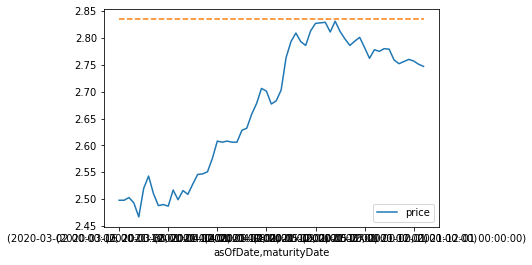

In [142]:
fig, axis = plt. subplots()
futprices_NatGas.loc[pd.IndexSlice[:,"2021-12-01"],:].plot(ax = axis, y = "price")
plt.plot([mean for i in range(len(futprices_NatGas.loc[pd.IndexSlice[:,"2021-12-01"],:]))], linestyle = "--")

In [147]:
t = [i for i in range(len(futprices_NatGas.loc[pd.IndexSlice[:,"2021-12-01"],"price"]))]
t

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62]

In [157]:
vasicekCallOpt(natGas2021.loc[pd.IndexSlice[:,"2021-12-01"],"bidrate"].values/100,t,63,1,natGas2021.loc[pd.IndexSlice[:,"2021-12-01"],"price"].values, reversion, mean, volatility)

TypeError: unsupported operand type(s) for -: 'int' and 'list'

In [158]:
natGas2021.loc[pd.IndexSlice[:,"2021-12-01"],"bidrate"]

asOfDate    maturityDate
2020-03-02  2021-12-01      0.815002
            2021-12-01      0.815002
            2021-12-01      0.815002
            2021-12-01      0.815002
            2021-12-01      0.815002
                              ...   
2020-05-29  2021-12-01      0.224998
            2021-12-01      0.224998
            2021-12-01      0.224998
            2021-12-01      0.224998
            2021-12-01      0.224998
Name: bidrate, Length: 4725, dtype: float64

In [159]:
natGas2021.loc[pd.IndexSlice[:,"2021-12-01"],"price"]

asOfDate    maturityDate
2020-03-02  2021-12-01      2.498
            2021-12-01      2.498
            2021-12-01      2.498
            2021-12-01      2.498
            2021-12-01      2.498
                            ...  
2020-05-29  2021-12-01      2.747
            2021-12-01      2.747
            2021-12-01      2.747
            2021-12-01      2.747
            2021-12-01      2.747
Name: price, Length: 4725, dtype: float64